<a href="https://colab.research.google.com/github/camigenius/Datavisualization-EDA/blob/main/PROYECTO_FINAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROYECTO FINAL UNIDAD 1-MACHINE LEARNING AND DATA SCIENCE
### ALUMNO: CAMILO ERNESTO FRANCO GUZMAN

####En este trabajo se analizara informacion de siniestros viales en la ciudad de Bogota desde el año 2015 al año 2020, la información se obtuvo de la pagina de datos abiertos de Bogotá [*Dataset* de *Datos abiertos Bogota*](https://datosabiertos.bogota.gov.co/dataset/siniestros-viales-consolidados-bogota-d-c).
####Elegi esta tematica dado que trabajo en una empresa de transporte y me parecio interesante ver que resultados se podrian obtener de esta dataset.

##Objetivos

#1.Reconocer cuales son la principales causas y factores de accidentalidad en Bogotá del año 2015 al 2020.

#2.Conocer a través de la Estadistica Descriptiva caracteristicas que nos ayuden a entender cuales son los factores de accidentalidad en Bogotá del año 2015 al 2020

#3.Analizar cuales actores viales por edad  se ven mas involucrados o son generadores de accidentes de transito.

#4.Evidenciar en que horas del dia se presenta mas accidentes de transito en Bogotá


In [ ]:
from scipy import stats
import scipy
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!python --version
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Python 3.7.12
SciPy 1.4.1
statsmodels 0.10.2
Pandas 1.3.5
NumPy 1.21.5
Matplotlib 3.2.2
Seaborn 0.11.2


In [ ]:
from pandas.io.pytables import IndexCol
siniestros=pd.read_excel('siniestros_viales.xlsx',sheet_name='SINIESTROS')

In [ ]:
siniestros.head()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2
1,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1
2,4401430,01/01/2015,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1
3,4401453,01/01/2015,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1
4,4401423,01/01/2015,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2


In [ ]:
siniestros.columns

Index(['CODIGO_ACCIDENTE', 'FECHA', 'HORA', 'GRAVEDAD', 'CLASE', 'CHOQUE',
       'OBJETO_FIJO', 'DIRECCION', 'CODIGO_LOCALIDAD', 'DISENO_LUGAR'],
      dtype='object')

In [ ]:
# Tenemos un dataFrame de 10 columnas y 196152 para un total de 1.961.520 registros en total
print(siniestros.shape)
print(siniestros.size)

(196152, 10)
1961520


In [ ]:
# se evalua que tipo de Datos conforman el DataFrame "siniestros"
siniestros.dtypes

CODIGO_ACCIDENTE      int64
FECHA                object
HORA                 object
GRAVEDAD              int64
CLASE                 int64
CHOQUE              float64
OBJETO_FIJO         float64
DIRECCION            object
CODIGO_LOCALIDAD      int64
DISENO_LUGAR          int64
dtype: object

###**Valores NAN Y float**
####Se verifica que tipo de Datos que conforman el dataframe, el cual quedo asignado a la variable *siniestro* una vez evaluado esto se observa que hay dos columnas con datos tipo float **CHOQUE** y **OBJETO FIJO** los cuales no requieren ser de este tipo ya que representan una categoria y para su posterior manipulacion se prefirio que fueran de dipo "int".A los valores NAN  se les asigna el valor 0 , dado que una vez se  analizó el Dataset para algunos registros no aplican darles una categoria ejemplo: la columna OBJETO_FIJO representa si hubo un objeto fijo en la colision o accidente de transito ,a estar  el campo vacio representa que no hubo un choque contra un objeto fijo si no fue originado por otras causas diferentes.

In [ ]:
siniestros.CHOQUE=siniestros.CHOQUE.fillna(0)
siniestros.OBJETO_FIJO=siniestros.OBJETO_FIJO.fillna(0)
siniestros.CHOQUE=siniestros.CHOQUE.astype(int)
siniestros.OBJETO_FIJO=siniestros.OBJETO_FIJO.astype(int)

siniestros.head()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401438,01/01/2015,01:05:00,2,2,0,0,KR 64A-CL 2C 02,16,2
1,4401449,01/01/2015,05:50:00,2,3,0,0,AV AVENIDA DEL SUR-KR 65A 41,7,1
2,4401430,01/01/2015,07:15:00,2,3,0,0,KR 19D-CL 62 S 02,19,1
3,4401453,01/01/2015,09:30:00,3,1,1,0,KR 79-CL 42F S 71,8,1
4,4401423,01/01/2015,09:45:00,2,1,1,0,CL 66A-KR 76 02,10,2


In [ ]:
# Dentro del archivo trabajado que es extension xlsx(excel) existe una hoja de nombre Diccionario en ella esta la deficion de los tipos de SINIESTROS, es decir GRAVEDAD,CLASE Y CHOQUE
# Se le asigna el nombre sinistros_dict
siniestros_dict=pd.read_excel('siniestros_viales.xlsx',sheet_name='DICCIONARIO')

In [ ]:
# se visualiza la informacion HOJA se refiere a que el archivo siniestros de tipo xlsx, tiene varias hojas como SINIESTROS , ACTOR_VIAL,VEHICULOS , HIPOTESIS
siniestros_dict.head(10)

,HOJA,CAMPO,CODIGO,DESCRIPCION
0,SINIESTROS,GRAVEDAD,1,Con Muertos
1,SINIESTROS,GRAVEDAD,2,Con Heridos
2,SINIESTROS,GRAVEDAD,3,Solo Daños
3,SINIESTROS,CLASE,7,Autolesion
4,SINIESTROS,CLASE,1,Choque
5,SINIESTROS,CLASE,2,Atropello
6,SINIESTROS,CLASE,4,Caida de ocupante
7,SINIESTROS,CLASE,3,Volcamiento
8,SINIESTROS,CLASE,6,Otro
9,SINIESTROS,CLASE,5,Incendio


In [ ]:
# se efectua una especie de filtro del dataframe de nombre "siniestros_dict" , esto se hace con la columana CAMPO ya que requeria  tener los registros que cumpieran con la condicion igual "=" GRAVEDAD
# una ves aplicada esta condicion optenemos solamente el codigo y la descripcion al cual se refiere la columa NOVEDAD en el dataframe de nombre "siniestros"
hoja_sinietros=siniestros_dict[siniestros_dict['CAMPO']=='GRAVEDAD']    
Dic_Gravedad=hoja_sinietros[['CODIGO','DESCRIPCION']]
Dic_Gravedad = Dic_Gravedad.rename(columns={'CODIGO':'GRAVEDAD','DESCRIPCION':'TIPO_GRAVEDAD'})
Dic_Gravedad.head() 

,GRAVEDAD,TIPO_GRAVEDAD
0,1,Con Muertos
1,2,Con Heridos
2,3,Solo Daños


###Se hace un merge para poder traer la informacion de *siniestros_dic* donde se define cada tipo de siniestro a el Dataframe principal *siniestros* y asi visualizar a que hace referencia la columna **GRAVEDAD**, que esta codificado como, 1 con muertos;2 con heridos;3 solo daños

In [ ]:
siniestros=Dic_Gravedad.merge(siniestros, on = 'GRAVEDAD')
siniestros.head()


,GRAVEDAD,TIPO_GRAVEDAD,CODIGO_ACCIDENTE,FECHA,HORA,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,1,Con Muertos,4401613,05/01/2015,20:20:00,1,1,0,AV AVENIDA SUBA-CL 128B 07,11,1
1,1,Con Muertos,4401753,07/01/2015,07:10:00,2,0,0,KR 18ABISA-CL 61 S 02,19,1
2,1,Con Muertos,4401701,07/01/2015,11:08:00,2,0,0,CL 9-KR 15A 02,14,2
3,1,Con Muertos,4401849,09/01/2015,11:30:00,2,0,0,CL 45-KR 72U S 14,8,1
4,1,Con Muertos,4401915,10/01/2015,10:30:00,1,4,2,CL 32B-KR 8F SE 07,4,1


In [ ]:
#Una vez Organizada la informacion podemos ver en como es la distribucion respecto a la GRAVEDAD del accidente 
siniestros['TIPO_GRAVEDAD'].value_counts()

Solo Daños     127919
Con Heridos     65238
Con Muertos      2995
Name: TIPO_GRAVEDAD, dtype: int64

###Se evidencia que  la mayoria de accidente son solo Daños materiales , seguido por accidentes donde se presentan heridos y por último accidentes con muertos 

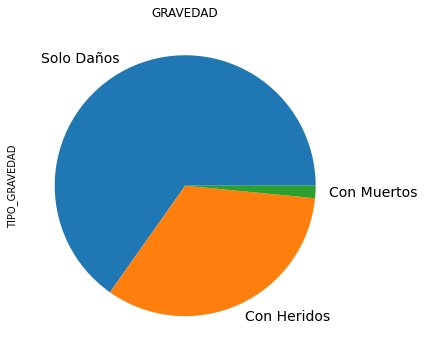

In [ ]:
from IPython.core.pylabtools import figsize
siniestros['TIPO_GRAVEDAD'].value_counts().plot.pie(title='GRAVEDAD',fontsize=14,figsize=(6,6));



In [ ]:
# Ahora se organiza la inforamcion para hacer el merge para la columna CLASE en el dataframe "siniestros"
hoja_siniestros=siniestros_dict[siniestros_dict['HOJA']=='SINIESTROS'] 
hoja_siniestros=hoja_siniestros[hoja_siniestros['CAMPO']=='CLASE']
Dic_Clase=hoja_siniestros[['CODIGO','DESCRIPCION']]
Dic_Clase = Dic_Clase.rename(columns={'CODIGO':'CLASE','DESCRIPCION':'TIPO_CLASE'})
Dic_Clase.sort_values('CLASE',inplace=True)
Dic_Clase   

,CLASE,TIPO_CLASE
4,1,Choque
5,2,Atropello
7,3,Volcamiento
6,4,Caida de ocupante
9,5,Incendio
8,6,Otro
3,7,Autolesion


###Se hace la misma manipulacion ahora para traer el campor TIPO_CLASE al dataframe principal "siniestros" y poder entender a que referencia hace la columna **CLASE**, que en este caso de estudio hace referencia a lo ocurrido en el accidente ejemplo choque, Autolesion

In [ ]:
siniestros=Dic_Clase.merge(siniestros, on = 'CLASE')
siniestros.head()

,CLASE,TIPO_CLASE,GRAVEDAD,TIPO_GRAVEDAD,CODIGO_ACCIDENTE,FECHA,HORA,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,1,Choque,1,Con Muertos,4401613,05/01/2015,20:20:00,1,0,AV AVENIDA SUBA-CL 128B 07,11,1
1,1,Choque,1,Con Muertos,4401915,10/01/2015,10:30:00,4,2,CL 32B-KR 8F SE 07,4,1
2,1,Choque,1,Con Muertos,4402075,13/01/2015,22:30:00,4,3,KR 19-CL 39B 34,13,1
3,1,Choque,1,Con Muertos,4402176,15/01/2015,18:00:00,1,0,AV AVENIDA CENTENARIO-KR 90 95,9,1
4,1,Choque,1,Con Muertos,4402171,15/01/2015,21:10:00,1,0,AV AVENIDA CIUDAD DE CALI-CL 20 02,9,1


In [ ]:

# Numero de accidentes por tipo clase se evidencia que el choque es el mas comun
siniestros['TIPO_CLASE'].value_counts()

Choque               167915
Atropello             20101
Caida de ocupante      4694
Volcamiento            2615
Otro                    788
Incendio                 25
Autolesion               14
Name: TIPO_CLASE, dtype: int64

### Se evidencia que tipo de accidente es por choques seguico por Atropello en último lugar se ubica Autlesion

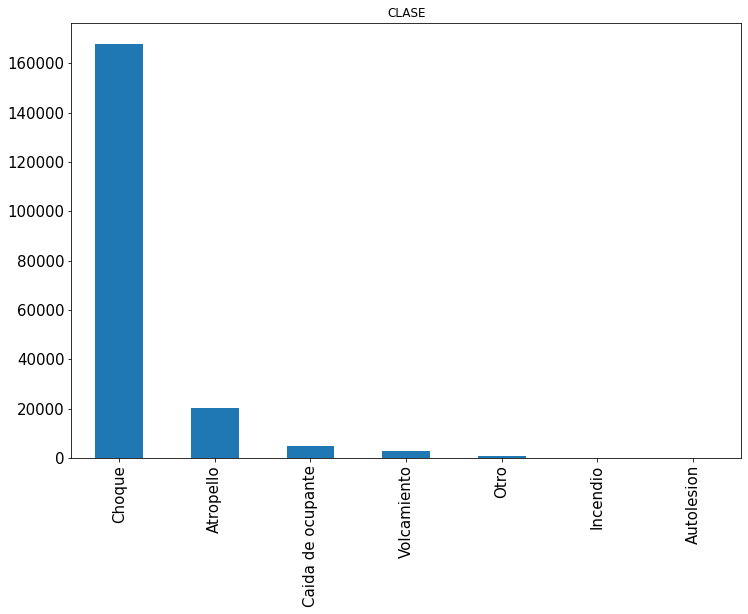

In [ ]:
siniestros['TIPO_CLASE'].value_counts().plot.bar(title='CLASE',fontsize=15,figsize=(12,8));

In [ ]:
hoja_sinietros=siniestros_dict[siniestros_dict['CAMPO']=='CHOQUE']    
Dic_Choque=hoja_sinietros[['CODIGO','DESCRIPCION']]
Dic_Choque = Dic_Choque.rename(columns={'CODIGO':'CHOQUE','DESCRIPCION':'TIPO_CHOQUE'})
Dic_Choque.head()

,CHOQUE,TIPO_CHOQUE
10,1,Vehiculo
11,2,Tren
12,3,Semoviente
13,4,Objeto Fijo


In [ ]:
siniestros=Dic_Choque.merge(siniestros, on = 'CHOQUE')
siniestros.tail()

,CHOQUE,TIPO_CHOQUE,CLASE,TIPO_CLASE,GRAVEDAD,TIPO_GRAVEDAD,CODIGO_ACCIDENTE,FECHA,HORA,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
167615,4,Objeto Fijo,1,Choque,3,Solo Daños,10530279,28/12/2020,19:54:00,10,KR 78K-CL 38C S 41,8,1
167616,4,Objeto Fijo,1,Choque,3,Solo Daños,10530314,29/12/2020,18:50:00,6,CL 21-KR 102 02,9,1
167617,4,Objeto Fijo,1,Choque,3,Solo Daños,10530376,30/12/2020,11:28:00,3,AV AVENIDA PASEO DE LOS LIBERTADORES-CL 215 02,1,1
167618,4,Objeto Fijo,1,Choque,3,Solo Daños,10530358,31/12/2020,00:17:00,1,KR 50-CL 5A 02,16,2
167619,4,Objeto Fijo,1,Choque,3,Solo Daños,10530454,31/12/2020,17:00:00,10,AV AVENIDA SUBA-CL 91 02,11,1


In [ ]:
siniestros['TIPO_CHOQUE'].value_counts()

Vehiculo       160808
Objeto Fijo      6689
Semoviente         95
Tren               28
Name: TIPO_CHOQUE, dtype: int64

##Se Evidencia que la mayoria de choques son contra Vehiculos , seguido con una menor participacion con Objeto Fijo, como dato curioso a pesar que los casos son minimos se presentaron 28 choques  dond con un tren en una cidudad donde este sistema de transporte es minimo y poco utlizado

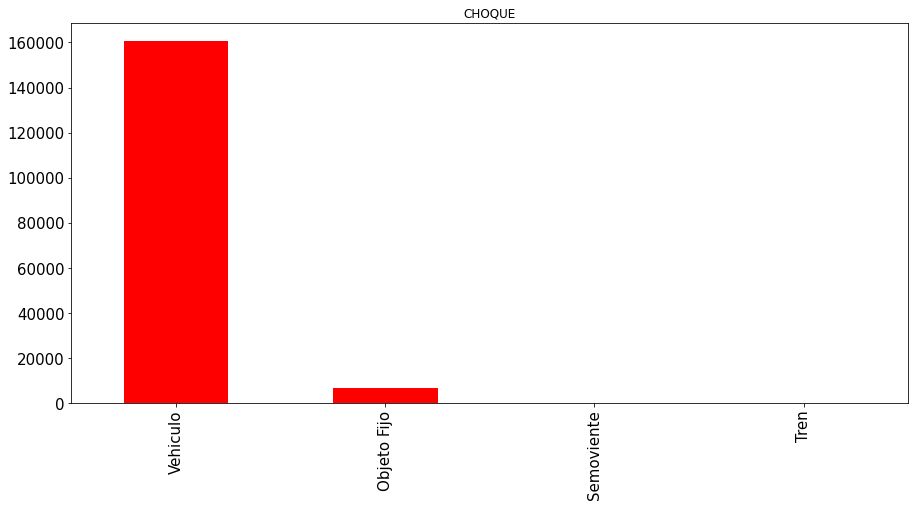

In [ ]:
siniestros['TIPO_CHOQUE'].value_counts().plot.bar(title='CHOQUE',fontsize=15,color='red',figsize=(15,7));

In [ ]:
hoja_sinietros=siniestros_dict[siniestros_dict['CAMPO']=='OBJETO_FIJO']    
Dic_Objeto_fijo=hoja_sinietros[['CODIGO','DESCRIPCION']]
Dic_Objeto_fijo = Dic_Objeto_fijo.rename(columns={'CODIGO':'OBJETO_FIJO','DESCRIPCION':'TIPO_OBJETO_FIJO'})
Dic_Objeto_fijo.head(11)

,OBJETO_FIJO,TIPO_OBJETO_FIJO
14,1,Muro
15,2,Poste
16,3,Arbol
17,4,Barandas
18,5,Semaforo
19,6,Inmueble
20,7,Hidrante
21,8,"Valla, Señal"
22,9,"Tarima, Caseta"
23,10,Vehiculo estacionado


In [ ]:
siniestros=Dic_Objeto_fijo.merge(siniestros, on = 'OBJETO_FIJO')
siniestros.head()

,OBJETO_FIJO,TIPO_OBJETO_FIJO,CHOQUE,TIPO_CHOQUE,CLASE,TIPO_CLASE,GRAVEDAD,TIPO_GRAVEDAD,CODIGO_ACCIDENTE,FECHA,HORA,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,1,Muro,4,Objeto Fijo,1,Choque,1,Con Muertos,4407491,08/03/2015,04:50:00,CL 52-KR 97 S 02,7,1
1,1,Muro,4,Objeto Fijo,1,Choque,1,Con Muertos,4408760,28/03/2015,18:50:00,CL 38A-KR 50 S 02,16,4
2,1,Muro,4,Objeto Fijo,1,Choque,1,Con Muertos,4409904,12/04/2015,15:40:00,KR 12-CL 46 ES 31,4,1
3,1,Muro,4,Objeto Fijo,1,Choque,1,Con Muertos,4412751,13/05/2015,17:45:00,AV AVENIDA DE LAS AMERICAS-AK 68 02,8,4
4,1,Muro,4,Objeto Fijo,1,Choque,1,Con Muertos,4414533,02/06/2015,21:15:00,AK 30-CL 39A 80,13,1


In [ ]:
siniestros['TIPO_OBJETO_FIJO'].value_counts()

Vehiculo estacionado    1746
Poste                   1552
Muro                    1252
Inmueble                 841
Otro                     325
Barandas                 291
Valla, Señal             227
Arbol                    219
Semaforo                 149
Tarima, Caseta            44
Hidrante                  36
Name: TIPO_OBJETO_FIJO, dtype: int64

##Se Observa que la mayor cantidad de siniestros se dan con vehiculos estacionados , seguido de postes y muros en menor proporción con tarimas ,casetas, e Hidrantes

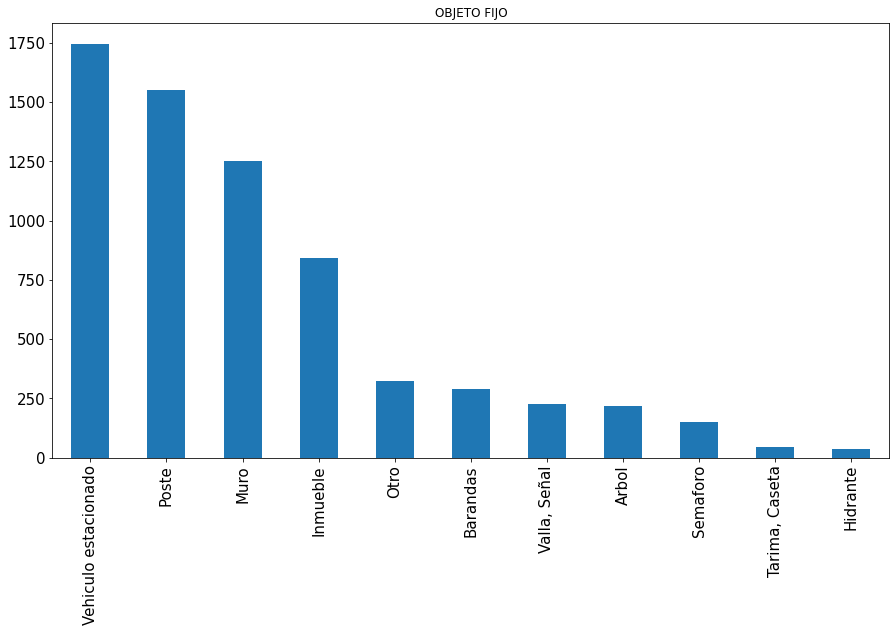

In [ ]:
siniestros['TIPO_OBJETO_FIJO'].value_counts().plot.bar(title='OBJETO FIJO',fontsize=15,figsize=(15,8));

In [ ]:
siniestros.sort_values('HORA',inplace=True)
siniestros


,OBJETO_FIJO,TIPO_OBJETO_FIJO,CHOQUE,TIPO_CHOQUE,CLASE,TIPO_CLASE,GRAVEDAD,TIPO_GRAVEDAD,CODIGO_ACCIDENTE,FECHA,HORA,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
4461,8,"Valla, Señal",4,Objeto Fijo,1,Choque,3,Solo Daños,4489721,08/08/2017,00:00:00,CL 24-KR 95A 2,9,1
5511,10,Vehiculo estacionado,4,Objeto Fijo,1,Choque,3,Solo Daños,4471162,28/01/2017,00:00:00,AV AVENIDA BOYACA-CL 23A 90,9,10
5540,10,Vehiculo estacionado,4,Objeto Fijo,1,Choque,3,Solo Daños,4474077,26/02/2017,00:00:00,KR 92-CL 8A 76,8,1
5671,10,Vehiculo estacionado,4,Objeto Fijo,1,Choque,3,Solo Daños,4500039,19/11/2017,00:00:00,CL 192-KR 11A 52,1,1
5311,10,Vehiculo estacionado,4,Objeto Fijo,1,Choque,3,Solo Daños,4436093,06/02/2016,00:00:00,CL 6-KR 14 S 02,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,2,Poste,4,Objeto Fijo,1,Choque,1,Con Muertos,4488116,20/07/2017,23:55:00,AV AVENIDA CIRCUNVALAR-CL 85 02,2,1
3804,6,Inmueble,4,Objeto Fijo,1,Choque,3,Solo Daños,4462895,30/10/2016,23:58:00,CL 1-KR 6 42,3,1
2780,2,Poste,4,Objeto Fijo,1,Choque,3,Solo Daños,10527334,20/11/2020,23:58:00,CL 70-KR 99 02,10,2
870,1,Muro,4,Objeto Fijo,1,Choque,3,Solo Daños,4503548,20/12/2017,23:58:00,KR 5-CL 22 2,3,1


#**ACTOR VIAL**

Dentro del dataset de tipo xlxs ,objeto del presente trabajo se encuentra la hoja Actor vial , la cual contine informacion respecto a la persona involucrada en el accidente de transito como Conductor,Peaton,Moticilista entre otros,Igulmente cuenta con información valiosa como Estado donde se clasifica  si la persona resultó ilesa,Herida o Muerta asi como el Genero y la Edad de la misma.

In [ ]:
# Para iniciar trabajar se carga el Dataset respectivo
Actor_vial=pd.read_excel('siniestros_viales.xlsx',sheet_name='ACTOR_VIAL')


In [ ]:
# Se evidencia que al visualizar el Dataframe en la columna EDAD hay valores numericos pero tambien una cadena de texto "SIN INFORMACION" la cual se analizara más adelante
Actor_vial.head(6)

,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401447,2452576,01/01/2015,CONDUCTOR,ILESO,44,FEMENINO,4401447-1
1,4401447,2452577,01/01/2015,CONDUCTOR,ILESO,31,MASCULINO,4401447-2
2,4401453,2452586,01/01/2015,CONDUCTOR,ILESO,47,MASCULINO,4401453-1
3,4401453,2452587,01/01/2015,CONDUCTOR,ILESO,29,MASCULINO,4401453-2
4,4401423,2452500,01/01/2015,CONDUCTOR,HERIDO,44,MASCULINO,4401423-1
5,4401423,2452501,01/01/2015,CONDUCTOR,ILESO,SIN INFORMACION,SIN INFORMACION,4401423-2


In [ ]:
# tenemos un Dataframe com 414505 filas y 8 columnas
print(Actor_vial.shape)
print(Actor_vial.size)

(422416, 8)
3379328


In [ ]:
# los codigos de accidente son int64 pero interesaria que datos como la edad tambien lo fuesen
Actor_vial.dtypes

CODIGO_ACCIDENTE       int64
CODIGO_ACCIDENTADO     int64
FECHA                 object
CONDICION             object
ESTADO                object
EDAD                  object
SEXO                  object
VEHICULO              object
dtype: object

In [ ]:
porcentaje=(Actor_vial['ESTADO'].value_counts())

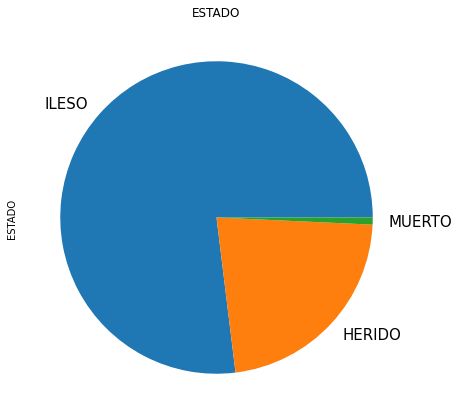

In [ ]:
# Mediante un grafico pie observamos la distribucion de Estado de las personas se observa que la mayoria resultan ilesas pero buena parte resultan Heridas y en ua menor prporcion muertas
Actor_vial['ESTADO'].value_counts().plot.pie(title='ESTADO',fontsize=15,figsize=(7,10));

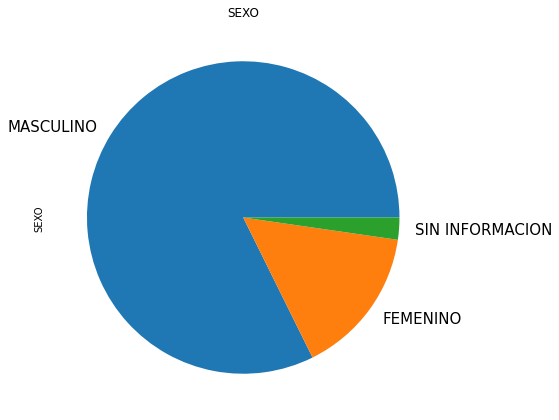

In [ ]:
# En cuanto a genrero se refiere mayormento son hombre los involucrados en los accidente una proporcion mucho menor  la tienen las mujeres
Actor_vial['SEXO'].value_counts().plot.pie(title='SEXO',fontsize=15,figsize=(7,10));

In [ ]:
# con esta linea de codigo Elimino las fila que estaban como cadena de caracteres "SIN INFORMACION"
Actor_vial.drop(Actor_vial.loc[Actor_vial['EDAD']=='SIN INFORMACION'].index, inplace=True)

In [ ]:
Actor_vial.EDAD=Actor_vial.EDAD.astype(int)

NameError: ignored

In [ ]:
Actor_vial.tail(10)

,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
422405,10530489,12728791,31/12/2020,CONDUCTOR,ILESO,39,MASCULINO,10530489-2
422406,10530490,12728792,31/12/2020,CONDUCTOR,ILESO,62,MASCULINO,10530490-1
422407,10530490,12728793,31/12/2020,CONDUCTOR,ILESO,37,MASCULINO,10530490-2
422408,10530491,12728796,31/12/2020,CONDUCTOR,ILESO,65,MASCULINO,10530491-1
422410,10530492,12728798,31/12/2020,CONDUCTOR,ILESO,55,MASCULINO,10530492-1
422411,10530492,12728799,31/12/2020,CONDUCTOR,ILESO,27,MASCULINO,10530492-2
422412,10530494,12728800,31/12/2020,CONDUCTOR,ILESO,39,MASCULINO,10530494-1
422413,10530494,12728801,31/12/2020,CONDUCTOR,ILESO,55,MASCULINO,10530494-2
422414,10530493,12728802,31/12/2020,CONDUCTOR,ILESO,55,MASCULINO,10530493-1
422415,10530493,12728803,31/12/2020,CONDUCTOR,ILESO,25,MASCULINO,10530493-2


In [ ]:
#aca ya puedo evidencia que la calumna Edad es de tipo int al elimnar las que contenian la cadena de caracteres"SIN INFORMACION"
Actor_vial.dtypes

CODIGO_ACCIDENTE       int64
CODIGO_ACCIDENTADO     int64
FECHA                 object
CONDICION             object
ESTADO                object
EDAD                   int64
SEXO                  object
VEHICULO              object
dtype: object

### **CONDICION**
### En la siguiente salida que nos da aplicar value_counts() a la columna condicion nos arroja queuno de los mayores actores viales involucrados en accidentes viales son los conductores de automoviles seguidos por los Motoclista y luego los pasajeros y/o acompañantes

In [ ]:
Actor_vial['CONDICION'].value_counts()

CONDUCTOR               298356
MOTOCICLISTA             51735
PASAJERO/ACOMPAÑANTE     27145
PEATON                   22789
CICLISTA                 12628
Name: CONDICION, dtype: int64

###**PROMEDIO EDAD**
###Resulta interesnte ver que el promedio de edad esta en los 37,7 años 
### vemos que el máximo esta en 120 alco poco probable , podria deberse a un error de tipeo y validar cuando datos pueden estar en rangos por ejemplo mayores a 100 años
###con la edad minima podria tratarse de niños recien nacidos involucrados en un accidente algo seria posible, para esto deberian estar por obvias razones en el la *condicion* como *pasajero/acompañante*

In [ ]:
# aca podemos ver que la edad promedio es 37,7 años
Actor_vial['EDAD'].mean()

37.788597199099485

##**FRECUENCIA**
###Observamos que la edad que mas ser repite es 27 segun los que nos arroja la funcion Describe() aplicada a la columna edad es que 12725 personas tenian esa edad cuando se presento el siniestro.


In [ ]:
Actor_vial['EDAD'].describe()

count    412653.000000
mean         37.788597
std          14.188200
min           0.000000
25%          27.000000
50%          36.000000
75%          47.000000
max         120.000000
Name: EDAD, dtype: float64

###**VALORES ATIPICOS-OULIERS**
### A continuanción se evalúa si pudieran  existir valores atípicos de la Edades de las personas involucradas en accidente, dado que no arrojo que la edad maxima que figura en el dataset es 120 años

In [ ]:
# Aplicamos medienta la funcion apply cuantas personas personas serian mayores a 100 (Esto de manera subjetiva dado que po intuicion son pocas la personas que cruzan este umbral de edad), con un resultado de 319
Actor_vial.apply(lambda x: x['EDAD'] >100, axis=1).sum()

310

In [ ]:
# También se evalúa cuantas persona menor a un año estuvieron invlucradas en el accidente 
Actor_vial.apply(lambda x: x['EDAD'] <1, axis=1).sum()

281

###Observamos que son poco los datos que podrian considerarse atípicos respecto al total y es poca la influencia que podria tener sobre los promedios y las desviaciones dato que el total registros es de 422416



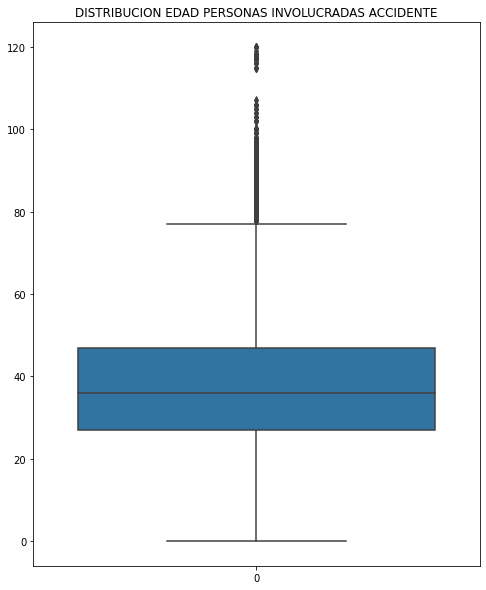

In [ ]:
plt.figure(figsize = ( 8 , 10 )) 
ax=sns.boxplot(data=Actor_vial['EDAD'])
ax.set_title("DISTRIBUCION EDAD PERSONAS INVOLUCRADAS ACCIDENTE");


##**kurtosis y Asimetria**
###Como obeservamos en el anterior diagrama de caja y bigotes o Boxplot que los datos esta bastaste concentrados entre los 27 y los 47 años segun los que nos arroja el percentit 25 y 75 respectivamente, de acuerdo a eso a continuacion se analisa cual es la Kurtosis y asimetria para la columna EDAD de nuestro DataFrame

In [ ]:
Actor_vial['EDAD'].quantile([0.25, 0.5, 0.75])

0.25    27.0
0.50    36.0
0.75    47.0
Name: EDAD, dtype: float64

In [ ]:
Actor_vial['EDAD'].skew()

0.6508547866581451

In [ ]:
Actor_vial['EDAD'].kurtosis()

0.6430647578268505

###Una vez realziada las pruebas de asimetria y Kurtosis se observa que los datoa que corresponden a la columna EDAD de las personas involucaradas en los accidentes de trafico  tienen una asimetria *POSITIVA* y una curtosis mayor a 0 es decir cin una forma *Leptocurtica*, como se evidencia en los siguientes Graficos 

In [ ]:
Actor_vial.drop(Actor_vial.loc[Actor_vial['SEXO']=='SIN INFORMACION'].index, inplace=True)

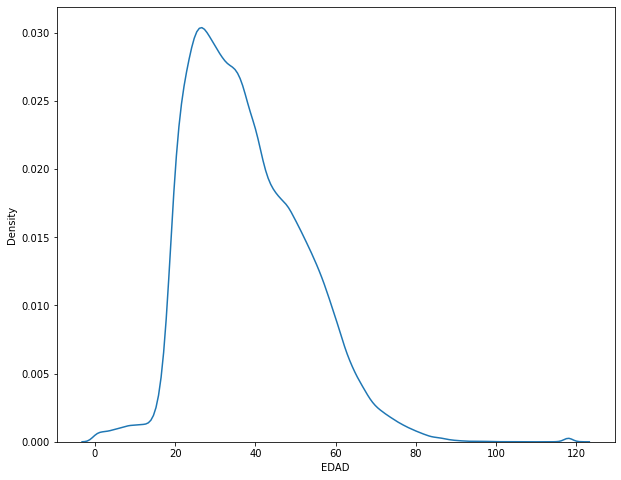

In [ ]:
plt.figure(figsize = ( 10 , 8 ))
sns.kdeplot(Actor_vial['EDAD']);

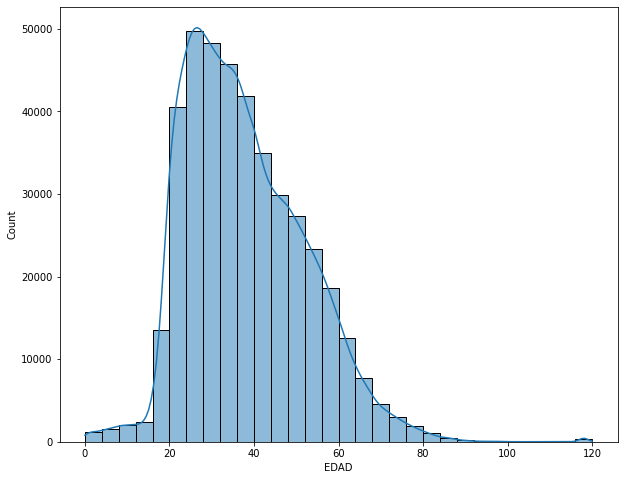

In [ ]:
plt.figure(figsize = ( 10 , 8 ))
sns.histplot(Actor_vial['EDAD'], kde=True,bins=30);

<Figure size 1080x1440 with 0 Axes>

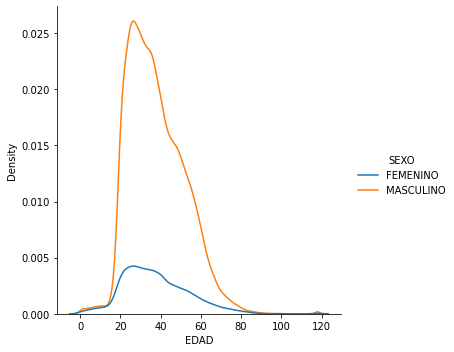

In [ ]:
plt.figure(figsize = ( 15 ,20 ))
sns.displot(data=Actor_vial, x="EDAD", kind="kde", hue = 'SEXO');

In [ ]:
Actor_vial.groupby(['SEXO'])['EDAD'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
FEMENINO,65046.0,37.346478,16.033856,0.0,26.0,35.0,47.0,118.0
MASCULINO,347607.0,37.871329,13.813926,0.0,27.0,36.0,47.0,120.0


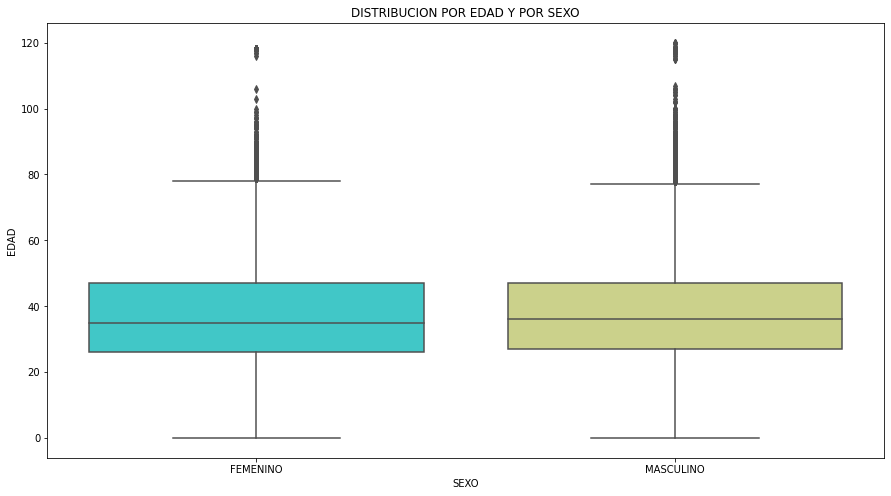

In [ ]:
plt.figure(figsize = ( 15 , 8 )) 
ax = sns.boxplot(x='SEXO', 
                 y='EDAD', 
                 data=Actor_vial, 
                 palette='rainbow')

ax.set_title("DISTRIBUCION POR EDAD Y POR SEXO")
ax.set_xlabel("SEXO")
ax.set_ylabel("EDAD");

In [ ]:
Actor_vial.groupby(['ESTADO'])['EDAD'].describe()

,count,mean,std,min,25%,50%,75%,max
ESTADO,,,,,,,,
HERIDO,93408.0,33.859230,17.021039,0.0,22.0,29.0,43.0,120.0
ILESO,316386.0,38.911096,12.920831,0.0,29.0,37.0,48.0,120.0
MUERTO,2859.0,41.947884,21.305545,0.0,24.0,35.0,57.5,120.0


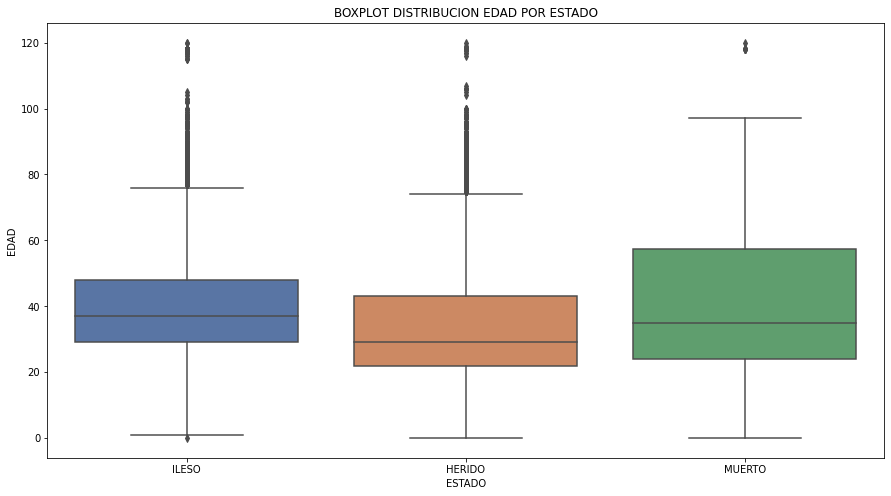

In [ ]:
plt.figure(figsize = ( 15 , 8 )) 
ax = sns.boxplot(x='ESTADO', 
                 y='EDAD', 
                 data=Actor_vial, 
                 palette='deep')

ax.set_title("BOXPLOT DISTRIBUCION EDAD POR ESTADO")
ax.set_xlabel("ESTADO")
ax.set_ylabel("EDAD");

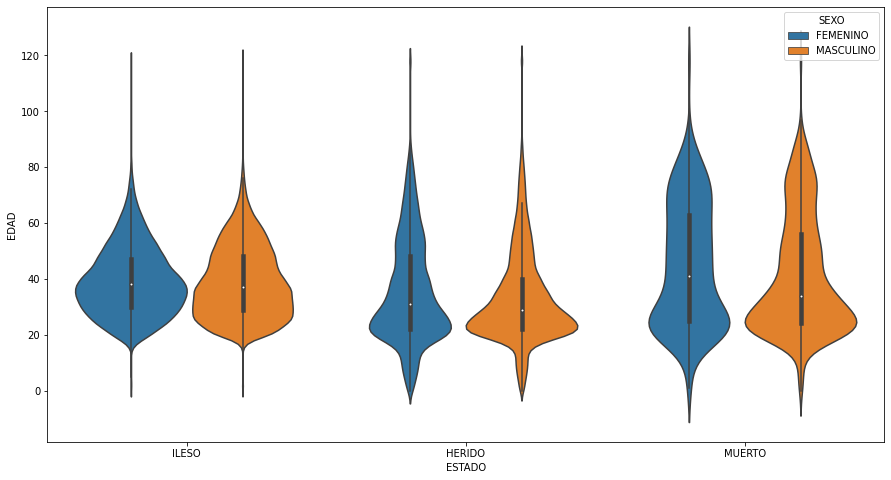

In [ ]:
plt.figure(figsize = ( 15 , 8 )) 
sns.violinplot(x="ESTADO", y="EDAD", data=Actor_vial, hue='SEXO');

In [ ]:
Actor_vial.groupby(['CONDICION'])['EDAD'].describe()

,count,mean,std,min,25%,50%,75%,max
CONDICION,,,,,,,,
CICLISTA,12628.0,32.243744,14.891715,2.0,21.0,28.0,41.0,120.0
CONDUCTOR,298356.0,39.633562,12.881367,0.0,30.0,38.0,49.0,120.0
MOTOCICLISTA,51735.0,29.624741,9.418491,1.0,23.0,27.0,34.0,118.0
PASAJERO/ACOMPAÑANTE,27145.0,34.136158,18.502689,0.0,21.0,30.0,46.0,118.0
PEATON,22789.0,39.590636,22.554930,0.0,21.0,36.0,57.0,120.0


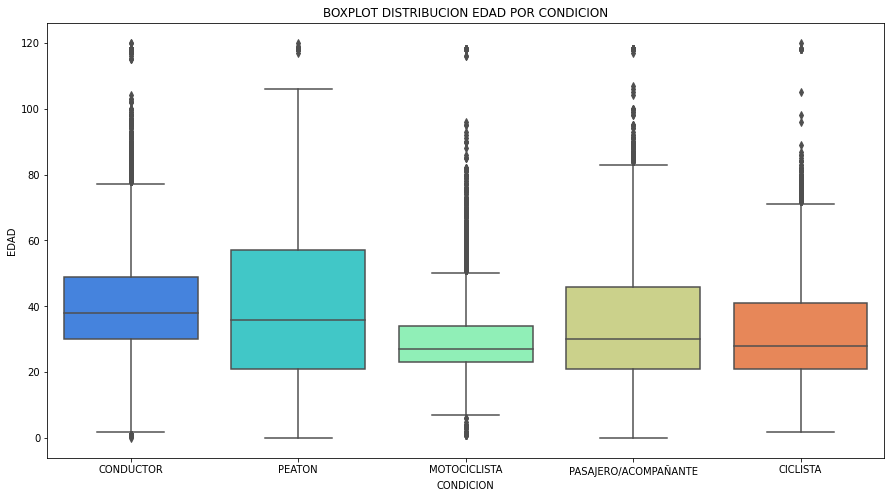

In [ ]:
plt.figure(figsize = ( 15 , 8 )) 
ax = sns.boxplot(x='CONDICION', 
                 y='EDAD', 
                 data=Actor_vial, 
                 palette='rainbow')

ax.set_title("BOXPLOT DISTRIBUCION EDAD POR CONDICION")
ax.set_xlabel("CONDICION")
ax.set_ylabel("EDAD");

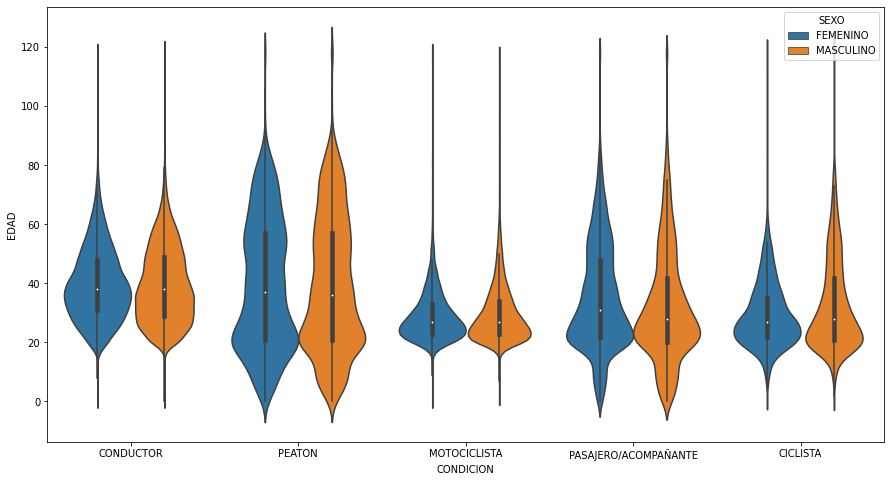

In [ ]:
plt.figure(figsize = ( 15 , 8 )) 
sns.violinplot(x="CONDICION", y="EDAD", data=Actor_vial, hue='SEXO');

#**Intervalo de confianza de una media**
## Sobre la EDAD se calcula  un intervalo de confianza ( β ) del 95% y significancia ( α )  5%. con la ayuda de la libreria statmodels

In [ ]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(Actor_vial['EDAD']).tconfint_mean(alpha = 0.05)
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(37.74530753992812, 37.83188685827085)


In [ ]:
variable=Actor_vial.loc[Actor_vial['SEXO'] =='FEMENINO','EDAD'] 

In [ ]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(variable).tconfint_mean(alpha = 0.05)
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(37.22325712310545, 37.469698631283755)


In [ ]:
variable=Actor_vial.loc[Actor_vial['SEXO'] =='MASCULINO','EDAD'] 

In [ ]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(variable).tconfint_mean(alpha = 0.05)
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(37.825406649884926, 37.91725100660646)


###**Interpretación**: Podemos afirmar con un nivel de confianza del  95% , que la edad media de  las personas involucaradas en accidentes de transito en bogotá occilan entre 37,2 y 37.4 para la MUJERES y entre 37,8 y 37,9 para los HOMBRES

##Como evaluamos del año 2015 a 2020 el promedio de edad de personas involucradas en accidentes esta en 37 años si se informara 5 años después  es decir al finalizar el 2025 el promedio de Edad paso a 39 ,quisiera saber si existe evidencia suficiente para afirmar que la media aumento de manera significativa

##Hipótesis:

##Hipótesis nula  H0:μ=37 
##Hipótesis alternativa  Ha:μ>37

In [ ]:
edad_promedio_poblacion = 37
n = 100                     
alpha = 0.05

In [ ]:
np.random.seed(132) 

muestra = np.random.normal(loc=39, scale=15, size=n) # datos alrededor de una de 39
print(np.round(muestra,1))

[30.8 58.4 46.4 47.7 30.8 56.2 37.4 44.2 26.9 40.6 37.6 45.9 32.9  9.1
 33.8 52.2 29.4 29.9 27.7 28.7 26.7 22.  26.6 40.1 40.9 46.4 23.4 49.4
 17.  39.8 28.4 35.4 68.9 41.3 43.3 26.6 38.2 38.8 27.5 43.1 46.3 26.3
 51.  31.2 57.7 35.2 47.  31.4 36.3 27.6 38.1 36.8 33.7 37.  39.8 44.1
 46.3 43.8 30.2 51.6 34.9 48.6 37.7 50.1 18.4 44.1 32.9 48.8 -0.1 69.2
  9.4 40.8 45.1 58.1 36.  26.6 42.3 29.3 25.2 33.1 55.1 26.1 30.7 42.9
 39.4 58.5  9.1 45.  38.5 27.  53.9 26.4 40.9 61.7 35.6 53.4 18.5 66.5
 34.8 51.4]


In [ ]:
z_score, p_valor = sm.stats.ztest(muestra, 
                                  value = edad_promedio_poblacion, 
                                  alternative = "larger")

print(f"Estadístico: {z_score}\np-valor: {p_valor}")

Estadístico: 0.8378592071853692
p-valor: 0.20105489076275612


In [ ]:
p_valor-alpha

0.00713149902272036

##
En este caso de prueba se observa que el *p-valor* es mayor que $\alpha = 0.05$ (nivel de significancia), razón por la cual se acepta la hipotesis nula y se rechaza la alternativa en el sentido que un promedio de 39 años de edad para el 2025 no indica que el promedio haya aumentado de manera significativa

In [ ]:
regresion=pd.read_excel('lesiones1.xlsx')

In [ ]:
regresion

,Hora_accidente,Numero_personas_lesionadas
0,1,3665
1,2,3277
2,3,4055
3,4,4901
4,5,12174
5,6,20943
6,7,25309
7,8,23914
8,9,21552
9,10,22845


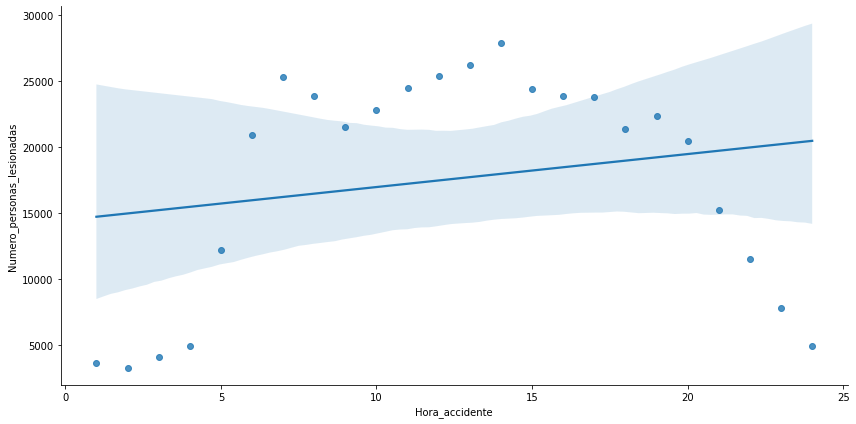

In [ ]:
from seaborn import regression
# Gráfico de tipo Grid
sns.lmplot(x ='Hora_accidente',
           y ='Numero_personas_lesionadas',
           height = 6,
           aspect = 2,
           data = regresion);

In [ ]:
pend, interc, corr, p_valor, error_std = stats.linregress(regresion['Hora_accidente'],regresion['Numero_personas_lesionadas'])

print(f"pend = {pend:10f}")
print(f"interc = {interc:10f}")
print(f"corr = {corr:10f}")
print(f"p_valor = {p_valor:10f}")
print(f"error_std = {error_std:10f}")

pend = 250.237391
interc = 14472.699275
corr =   0.206816
p_valor =   0.332226
error_std = 252.384954


In [ ]:

def correlacion_pearson_con_significancia(x, y, alfa=0.05):
  coef, p = stats.pearsonr(x, y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')

In [ ]:
correlacion_pearson_con_significancia(regresion['Hora_accidente'],regresion['Numero_personas_lesionadas'])

Coeficiente de correlación de Pearson: 0.21
Las muestras no están correlacionadas (no rechazar H0) (p = 0.33)


# Investigue que modelo podria ajsutarse mas segun la visualizacion de la grafica y encontre esta imagen de regredion Polynomial y busque como aplicarla en starmodels y evidente mejoro el ajuste de la linea a los puntos de la grafica


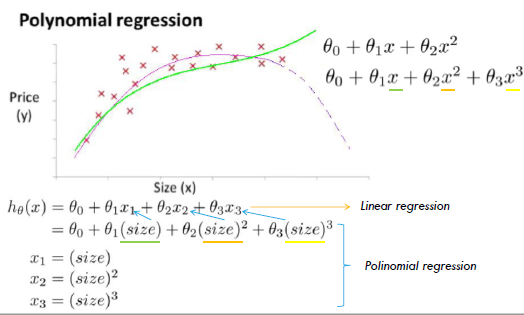

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly= PolynomialFeatures(degree=5)

In [ ]:
x= regresion['Hora_accidente'].values
y= regresion['Numero_personas_lesionadas'].values

In [ ]:
x=x.reshape(-1,1)

In [ ]:
x_poly=poly.fit_transform(x)

In [ ]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=5)

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(x_poly,y)

LinearRegression()

In [ ]:
y_pred=linreg.predict(x_poly)

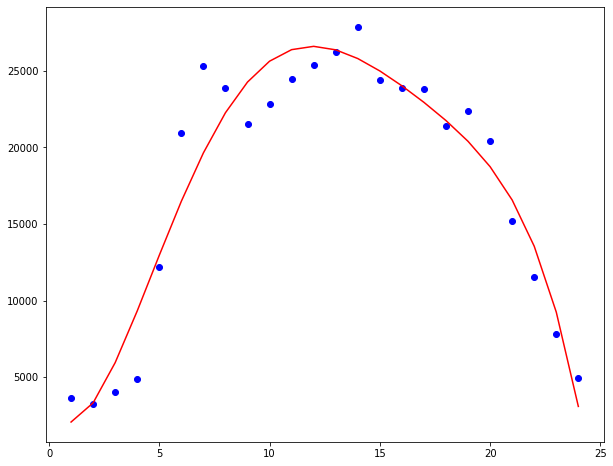

In [ ]:
plt.figure(figsize = ( 10 , 8 ))
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red');